In [1]:
import time 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [3]:
# for faster convergence
train_samples = 5000

data= pd.read_csv('mnist_784.csv')
random_state = check_random_state(0)

In [4]:
y = data['class']
X = data.iloc[:,:-1]
X = X/255
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64

In [65]:
x_train, x_test,y_train, y_test = train_test_split(X,y,train_size=train_samples, test_size=10000,random_state=0)

In [66]:
"""Standardization of a dataset is a common requirement for many machine learning estimators:
they might behave badly if the individual feature do not more or less look like standard normally distributed data 
(e.g. Gaussian with 0 mean and unit variance).
"""
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [75]:
t0 = time.time()
clf = LogisticRegression(C=50/train_samples,
                        multi_class = 'multinomial',
                        penalty ='l1',solver = 'saga',
                        tol = 0.1)
clf.fit(x_train,y_train)
y_predicted1 = clf.predict(x_test)
accuracyscore1 = accuracy_score(y_test, y_predicted1)
print(accuracyscore1)

0.8343


runtime in 5.749 s


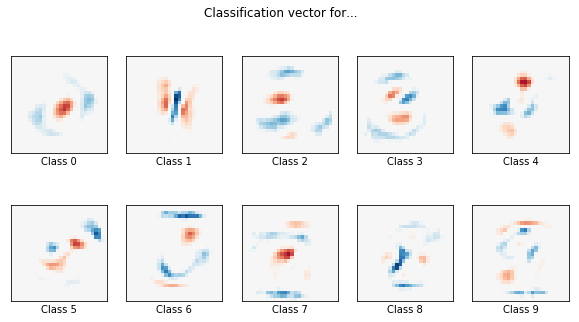

In [76]:
coef1 = clf.coef_.copy()
plt.figure(figsize=(10,5))
scale1 = np.abs(coef1).max()

for i in range(10):
    l1_plot = plt.subplot(2,5,i+1)
    l1_plot.imshow(coef1[i].reshape(28,28),interpolation='nearest',
                 cmap=plt.cm.RdBu,vmin = -scale1,vmax=scale1)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i'% i)
plt.suptitle('Classification vector for...')
run_time=time.time()-t0
print('runtime in %.3f s' % run_time)
plt.show()

In [67]:
t0 = time.time()
modelxgb = xgb.XGBClassifier(booster='gblinear',alpha =0.1)
modelxgb.fit(x_train,y_train)

XGBClassifier(alpha=0.1, base_score=0.5, booster='gblinear',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [55]:
y_predicted2 = modelxgb.predict(x_test)
accuracyscore2 = accuracy_score(y_test, y_predicted2)
accuracyscore2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8562

runtime in 1914.610 s


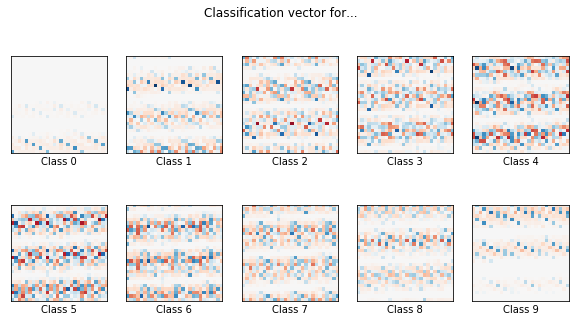

In [72]:
coef2 = modelxgb.coef_.copy()
plt.figure(figsize=(10,5))
scale2 = np.abs(coef2).max()
for i in range(10):
    l1_plot = plt.subplot(2,5,i+1)
    l1_plot.imshow(coef[i].reshape(28,28),interpolation='nearest',
                 cmap=plt.cm.RdBu,vmin = -scale2,vmax=scale2)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i'% i)
plt.suptitle('Classification vector for...')
run_time=time.time()-t0
print('runtime in %.3f s' % run_time)
plt.show()

In [77]:
param_list = [("eta", 0.08), ("max_depth", 6), ("subsample", 0.8), ("colsample_bytree", 0.8), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("alpha", 8), ("lambda", 2), ("num_class", 10)]
n_rounds = 600
early_stopping = 50
    
d_train = xgb.DMatrix(x_train, label=y_train)
d_val = xgb.DMatrix(x_test, label=y_test)
eval_list = [(d_train, "train"), (d_val, "validation")]
bst = xgb.train(param_list, d_train, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-merror:0.1612	validation-merror:0.2263
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[1]	train-merror:0.1186	validation-merror:0.1739
[2]	train-merror:0.1062	validation-merror:0.1662
[3]	train-merror:0.0956	validation-merror:0.153
[4]	train-merror:0.0858	validation-merror:0.1415
[5]	train-merror:0.0812	validation-merror:0.1378
[6]	train-merror:0.079	validation-merror:0.136
[7]	train-merror:0.0742	validation-merror:0.1331
[8]	train-merror:0.0728	validation-merror:0.1306
[9]	train-merror:0.0696	validation-merror:0.1267
[10]	train-merror:0.0686	validation-merror:0.1278
[11]	train-merror:0.068	validation-merror:0.1268
[12]	train-merror:0.0674	validation-merror:0.1245
[13]	train-merror:0.0656	validation-merror:0.1243
[14]	train-merror:0.065	validation-merror:0.1232
[15]	train-merror:0.0622	validation-merror:0.1208
[16]	train-merror:0.0624	validation-merror:0.1205
[17]	t

[161]	train-merror:0.0116	validation-merror:0.0828
[162]	train-merror:0.0116	validation-merror:0.0829
[163]	train-merror:0.0116	validation-merror:0.083
[164]	train-merror:0.0114	validation-merror:0.0828
[165]	train-merror:0.0114	validation-merror:0.0827
[166]	train-merror:0.0114	validation-merror:0.0829
[167]	train-merror:0.0112	validation-merror:0.0827
[168]	train-merror:0.0112	validation-merror:0.0827
[169]	train-merror:0.011	validation-merror:0.0826
[170]	train-merror:0.011	validation-merror:0.0827
[171]	train-merror:0.0106	validation-merror:0.0825
[172]	train-merror:0.0106	validation-merror:0.0823
[173]	train-merror:0.0108	validation-merror:0.0823
[174]	train-merror:0.0108	validation-merror:0.0823
[175]	train-merror:0.0108	validation-merror:0.0823
[176]	train-merror:0.0106	validation-merror:0.0823
[177]	train-merror:0.0104	validation-merror:0.0822
[178]	train-merror:0.0104	validation-merror:0.0824
[179]	train-merror:0.0104	validation-merror:0.0824
[180]	train-merror:0.0104	validati

In [79]:

d_test = xgb.DMatrix(data=x_test)
y_pred = bst.predict(d_test)

accuracyscore3 = accuracy_score(y_test, y_pred)
accuracyscore3

0.9188

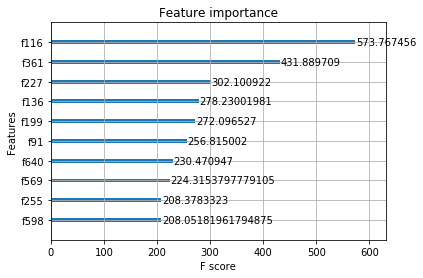

In [83]:
xgb.plot_importance(bst,max_num_features=10,importance_type='cover')

In [5]:
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05529723
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.986800
Test set score: 0.970000


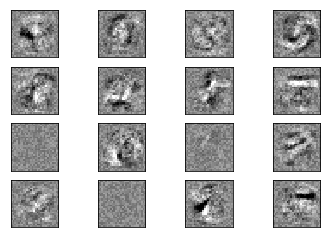

In [7]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()